<a href="https://colab.research.google.com/github/gabriquaranta/drones-stuff/blob/main/yolo11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 18.2 MB/s eta 0:00:00


In [2]:
!kaggle datasets download dasmehdixtr/drone-dataset-uav

Dataset URL: https://www.kaggle.com/datasets/dasmehdixtr/drone-dataset-uav
License(s): copyright-authors
 99% 711M/716M [00:12<00:00, 70.0MB/s]
100% 716M/716M [00:12<00:00, 61.4MB/s]


In [3]:
%%capture
!unzip drone-dataset-uav.zip

In [4]:
!ls

dataset_xml_format  drone-dataset-uav.zip  drone_dataset_yolo  sample_data


In [5]:
!rm -rf ./dataset_xml_format/

In [6]:
!ls ./drone_dataset_yolo/dataset_txt

0001.jpg       foto00378.jpg  pic_078.txt   pic_176.jpg  pic_413.txt  pic_655.jpg  pic_932.txt
0001.txt       foto00378.txt  pic_079.jpg   pic_176.txt  pic_414.jpg  pic_655.txt  pic_935.jpg
0003.jpg       foto00987.jpg  pic_079.txt   pic_177.jpg  pic_414.txt  pic_656.jpg  pic_935.txt
0003.txt       foto00987.txt  pic_080.jpg   pic_177.txt  pic_415.jpg  pic_656.txt  pic_937.jpg
0004.jpg       foto01016.jpg  pic_080.txt   pic_179.jpg  pic_415.txt  pic_657.jpg  pic_937.txt
0004.txt       foto01016.txt  pic_081.jpg   pic_179.txt  pic_416.jpg  pic_657.txt  pic_939.jpg
0005.jpg       foto01045.jpg  pic_081.txt   pic_180.jpg  pic_416.txt  pic_658.jpg  pic_939.txt
0005.txt       foto01045.txt  pic_082.jpg   pic_180.txt  pic_417.jpg  pic_658.txt  pic_940.jpg
0006.jpg       foto01074.jpg  pic_082.txt   pic_181.jpg  pic_417.txt  pic_659.jpg  pic_940.txt
0006.txt       foto01074.txt  pic_083.jpg   pic_181.txt  pic_418.jpg  pic_659.txt  pic_942.jpg
0007.jpg       foto01103.jpg  pic_083.txt   pic_18

In [7]:
import os
import random

dirname='./drone_dataset_yolo/dataset_txt'

#count txt files in drone_dataset_yoy/dataset_txt
filenames = [f[:-4] for f in os.listdir(dirname) if f.endswith('.txt')]
n_pics=len(filenames)
print(n_pics)

ids=[i for i in range(n_pics)]
random.shuffle(ids)
#print(ids)

trainratio=0.8
valratio=0.1
testratio=0.1

train_ids=ids[:int(n_pics*trainratio)]
val_ids=ids[int(n_pics*trainratio):int(n_pics*(trainratio+valratio))]
test_ids=ids[int(n_pics*(trainratio+valratio)):]

print(len(train_ids), len(val_ids), len(test_ids))

1360
1088 136 136


In [8]:
!rm -rf ./train ./val ./test
!mkdir ./train
!mkdir ./val
!mkdir ./test

# cp images and txt from drone_dataset_yolo to corresponding train or test folders
for i in train_ids:
  try:
    !cp ./drone_dataset_yolo/dataset_txt/{filenames[i]}.txt ./train/{filenames[i]}.txt
    !cp ./drone_dataset_yolo/dataset_txt/{filenames[i]}.jpg ./train/{filenames[i]}.jpg
  except:
    print(filenames[i])
    continue

for i in val_ids:
  try:
    !cp ./drone_dataset_yolo/dataset_txt/{filenames[i]}.txt ./val/{filenames[i]}.txt
    !cp ./drone_dataset_yolo/dataset_txt/{filenames[i]}.jpg ./val/{filenames[i]}.jpg
  except:
    print(filenames[i])
    continue

for i in test_ids:
  try:
    !cp ./drone_dataset_yolo/dataset_txt/{filenames[i]}.txt ./test/{filenames[i]}.txt
    !cp ./drone_dataset_yolo/dataset_txt/{filenames[i]}.jpg ./test/{filenames[i]}.jpg
  except:
    print(filenames[i])
    continue


cp: cannot stat './drone_dataset_yolo/dataset_txt/classes.jpg': No such file or directory


In [9]:
!mkdir datasets
!mv ./train datasets/
!mv ./val datasets/
!mv ./test datasets/

In [18]:
import yaml

data_yaml = dict(
    train ='train',
    val = 'val',
    test='test',
    nc =1,
    names =['drone']
)

with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

%cat data.yaml

{names: [drone], nc: 1, test: test, train: train, val: val}


In [19]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")

In [20]:
!yolo task=detect mode=train model=yolo11n.pt data=data.yaml epochs=12 imgsz=480

Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=12, time=None, patience=100, batch=16, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

./runs/detect/train3


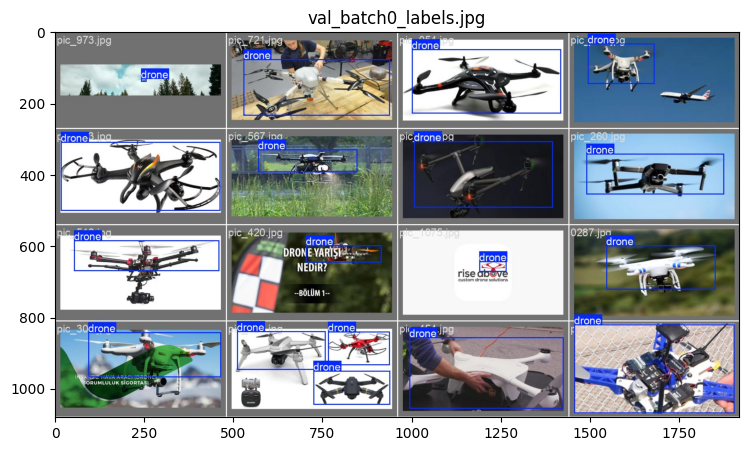

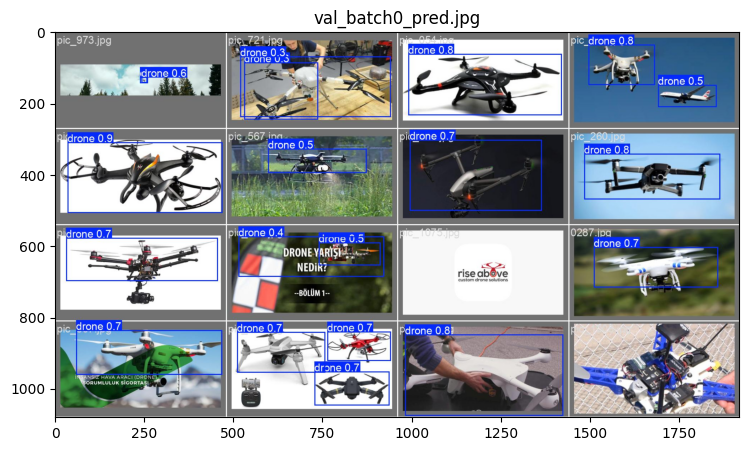

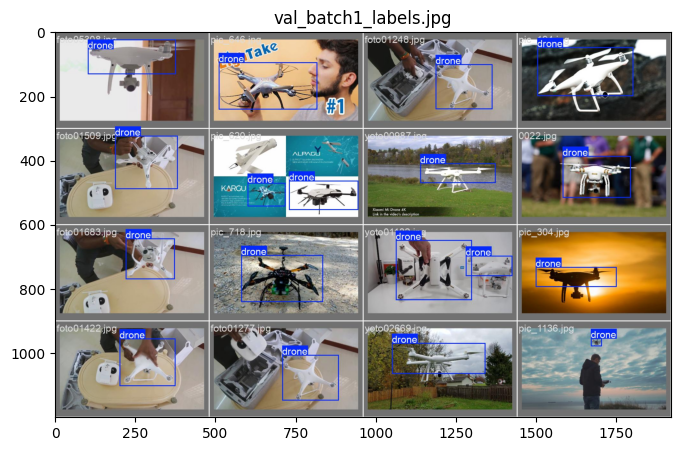

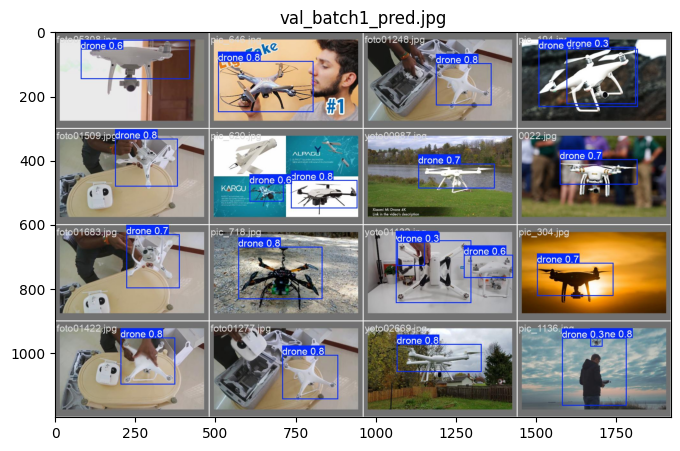

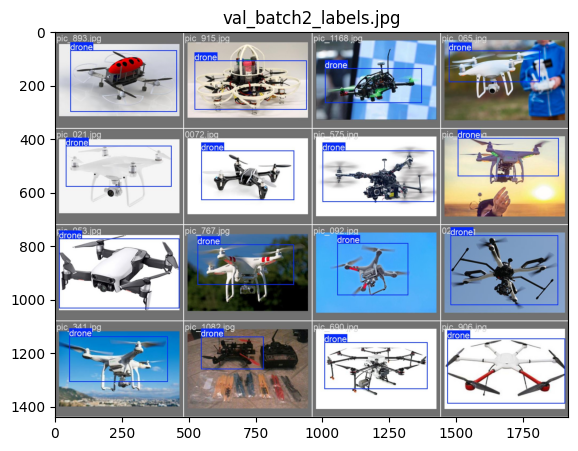

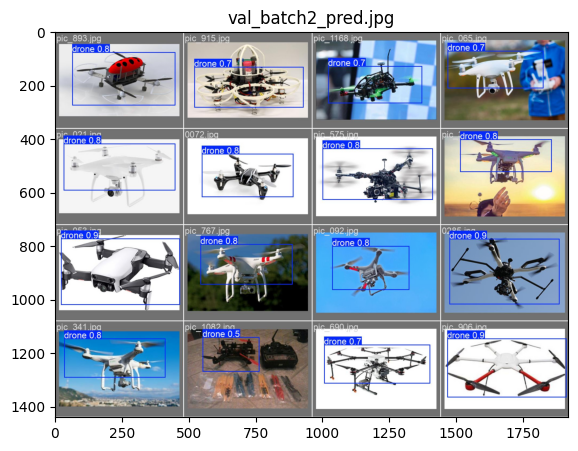

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

rus_outputs='./runs/detect/'
out_dir=os.path.join(rus_outputs,os.listdir(rus_outputs)[0])
print(out_dir)

imgs=[]

for val_res in os.listdir(out_dir):
  if 'val_batch' in val_res:
    imgs.append(val_res)

imgs.sort()
for val_res in imgs:
    image = Image.open(os.path.join(out_dir,val_res))
    image=np.array(image)
    plt.figure(figsize=(10,5))
    plt.title(val_res)
    plt.imshow(image)
    plt.show()


